In [3]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Mounted at /content/drive


Outlier: anomalia all'interno dei dati che possono dare non solo risultati sbagliati, ma anche (per i sistemi di machine learning) di fare previsioni completamente sbagliati.

Indici posizionali
Fanno capire come il dataset si comporta attorno ad un determinato valore (es. quanto si allontana un valore alla media etc.)

Quando creo una nuova funzionalità, è necessario far partire un test.
assert tra il valore di ritorno ed il valore atteso.

Come visualizzare la media
Data la media posso verificare la dispersione dei dati
Anomalie vengono compresse quando vado a calcolare la media

Media geometrica
Usata soprattutto per le serie storiche in quanto è uno degli indici più intuitivi per il tasso di variazione rispetto ai dati

Quantili
Segmentare il dataset per controllare i dati in base ad alcuni intervalli predeterminati.
Sono indici di posizione mobili.

Mediana
Valore che sta in mezzo alla distribuzione (diverso dalla media: è un valore non soggetto alle anomalie. Si valuta la posizione del dato all'interno del dataset).
Le anomalie non vengono eliminate, ma vengono loro assegnati i valori di confine.

In [4]:
# Esercizio 29_6
# Visualizzare la frequenza di ogni valore associato al numero di componenti (rispetto al numero dei componenti qual è l'andamento di tempo, come progredisce)
# Differenza relativa ed assoluta da anno ad anno ('95-'96,'96-'97)
# Visualizzazione grafica
# Calcolare la media come indice
#
df_pt = pd.read_csv('/content/drive/MyDrive/Corso ai_ml_py/dataset/Produttivita-dei-terreni-agricoli-per-regione.csv', sep=';', encoding='latin1')
display(df_pt)

Anno              Regione  Produttività in migliaia di euro
0    1995             Piemonte                            1.4324
1    1995        Valle d'Aosta                            0.4478
2    1995            Lombardia                            2.4299
3    1995  Trentino-Alto Adige                            1.9073
4    1995               Veneto                            2.4897
..    ...                  ...                               ...
335  2011               Puglia                            1.6048
336  2011           Basilicata                            0.8504
337  2011             Calabria                            2.6381
338  2011              Sicilia                            1.7310
339  2011             Sardegna                            0.7485

[340 rows x 3 columns]

In [5]:
# Controlla se ci sono valori mancanti
display(df_pt.isna())

# Inserisco i dati del dataframe in una variabile (anno 95)
cmp_a_1995 = df_pt[df_pt["Anno"] == 1995]["Produttività in migliaia di euro"]

# Inserisco i dati del dataframe in una variabile (anno 96)
cmp_a_1996 = df_pt[df_pt["Anno"] == 1996]["Produttività in migliaia di euro"]

# Inserisco i dati del dataframe in una variabile (anno 97)
cmp_a_1997 = df_pt[df_pt["Anno"] == 1997]["Produttività in migliaia di euro"]

# Visualizza i dati per l'anno 1995
#display(cmp_a_1995)

# Visualizza i dati per l'anno 1996
#display(cmp_a_1996)

# Visualizza i dati per l'anno 1997
#display(cmp_a_1997)

# Calcola la differenza assoluta tra il 1995 e il 1996 e mostra a schermo
df_da_95_96 = cmp_a_1996.to_numpy() - cmp_a_1995.to_numpy()
print("La differenza di produttività tra il 1995 e il 1996 è di", df_da_95_96[0])

# Calcola la differenza relativa tra il 1995 e il 1996 e mostra a schermo
df_dr_95_96 = df_da_95_96 / cmp_a_1995.to_numpy()
print("La produttività è variata del", df_dr_95_96[0] * 100, "% tra il 1995 e il 1996")

# Calcola la differenza assoluta tra il 1996 ed il 1997 e mostra a schermo
df_da_96_97 = cmp_a_1997.to_numpy() - cmp_a_1996.to_numpy()
print("\nLa differenza di produttività tra il 1996 e il 1997 è di", df_da_96_97[0])

# Calcola la differenza relativa tra il 1996 ed il 1997 e mostra a schermo
df_dr_96_97 = df_da_96_97 / cmp_a_1996.to_numpy()
print("La produttività è variata del", df_dr_96_97[0] * 100, "% tra il 1996 e il 1997")

Anno  Regione  Produttività in migliaia di euro
0    False    False                             False
1    False    False                             False
2    False    False                             False
3    False    False                             False
4    False    False                             False
..     ...      ...                               ...
335  False    False                             False
336  False    False                             False
337  False    False                             False
338  False    False                             False
339  False    False                             False

[340 rows x 3 columns]

La differenza di produttività tra il 1995 e il 1996 è di 0.038000000000000034
La produttività è variata del 2.652890254118964 % tra il 1995 e il 1996

La differenza di produttività tra il 1996 e il 1997 è di -0.11339999999999995
La produttività è variata del -7.712187159956471 % tra il 1996 e il 1997


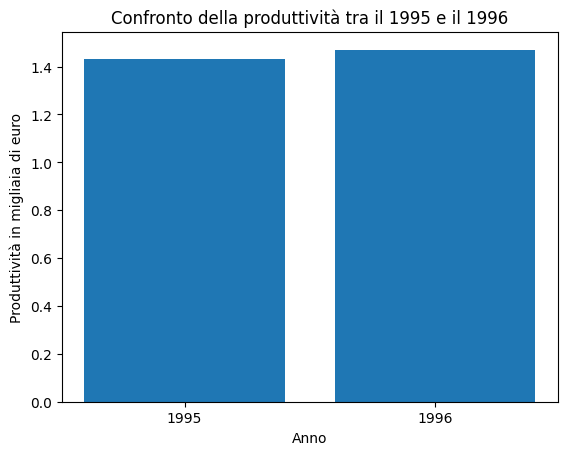

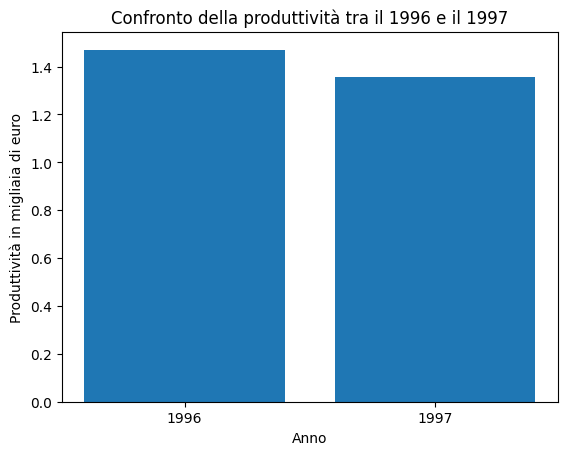

In [6]:
### Creazione grafici ###
## Grafico per biennio 95-96 ##

# Dati per l'asse x (anni)
anni = ['1995', '1996']

# Dati per l'asse y (produttività)
produttivita = [cmp_a_1995.iloc[0], cmp_a_1996.iloc[0]]

# Crea il grafico passando l'asse delle ascisse e delle ordinate
plt.bar(anni, produttivita)

# Label degli assi
plt.xlabel('Anno')
plt.ylabel('Produttività in migliaia di euro')

# Titolo del grafico
plt.title('Confronto della produttività tra il 1995 e il 1996')

# Stampa il grafico
plt.show()

## Grafico per biennio 96-97 ##

# Seleziona i dati per l'anno 1996
cmp_a_1996 = df_pt[df_pt["Anno"] == 1996]["Produttività in migliaia di euro"]

# Seleziona i dati per l'anno 1997
cmp_a_1997 = df_pt[df_pt["Anno"] == 1997]["Produttività in migliaia di euro"]

# Dati per l'asse x (anni)
anni = ['1996', '1997']

# Dati per l'asse y (produttività)
produttivita = [cmp_a_1996.iloc[0], cmp_a_1997.iloc[0]]

# Crea il grafico passando l'asse delle ascisse e delle ordinate
plt.bar(anni, produttivita)

# Label degli assi
plt.xlabel('Anno')
plt.ylabel('Produttività in migliaia di euro')

# Titolo del grafico
plt.title('Confronto della produttività tra il 1996 e il 1997')

# Stampa il grafico
plt.show()

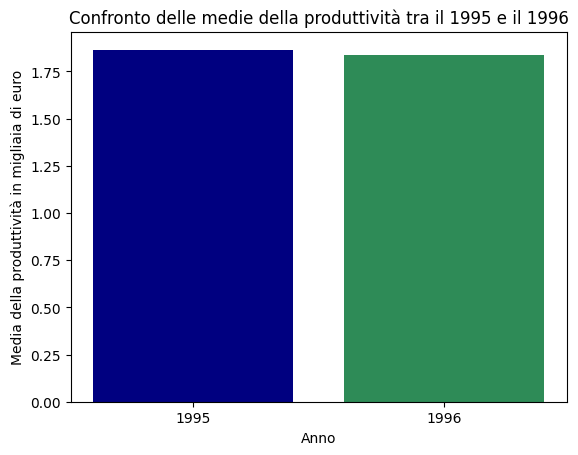

In [7]:
## Calcolo della media ##

# Creazione della variabile media_anno ed inizializzazione della variabile con il metodo .mean()
media_1995 = cmp_a_1995.mean()
media_1996 = cmp_a_1996.mean()

# Dati per l'asse x (anni)
anni = ['1995', '1996']

# Dati per l'asse y (medie della produttività)
medie_produttivita = [media_1995, media_1996]

# Crea il grafico a barre
colore = ['navy', 'seagreen']
plt.bar(anni, medie_produttivita, color=colore)

# Aggiunge label degli assi
plt.xlabel('Anno')
plt.ylabel('Media della produttività in migliaia di euro')

# Titolo del grafico
plt.title('Confronto delle medie della produttività tra il 1995 e il 1996')

# Mostra il grafico
plt.show()


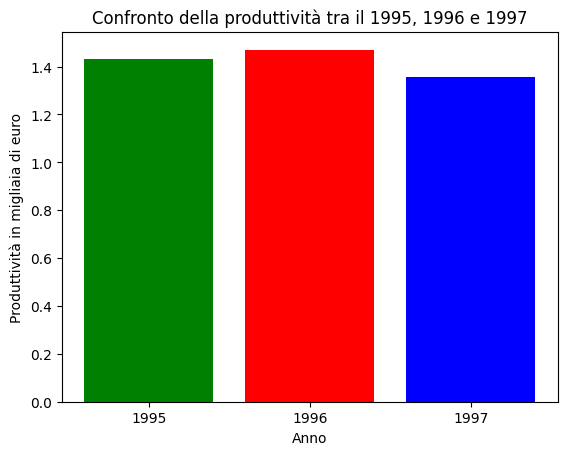

In [8]:
## Creazione grafico per il triennio 95-96-97 ##

# Dati per l'asse x (anni)
anni = ['1995', '1996', '1997']

# Dati per l'asse y (produttività)
produttivita = [cmp_a_1995.iloc[0] ,cmp_a_1996.iloc[0] , cmp_a_1997.iloc[0]]

# Crea il grafico a barre
colore = ['green', 'red', 'blue']
plt.bar(anni, produttivita, color=colore)

# Aggiungi etichette agli assi
plt.xlabel('Anno')
plt.ylabel('Produttività in migliaia di euro')

# Aggiungi un titolo al grafico
plt.title('Confronto della produttività tra il 1995, 1996 e 1997')

# Mostra il grafico
plt.show()

In [9]:


# Seleziona i dati per l'anno 1995
cmp_a_1995 = df_pt[df_pt["Anno"] == 1995]["Produttività in migliaia di euro"]

# Seleziona i dati per l'anno 1996
cmp_a_1996 = df_pt[df_pt["Anno"] == 1996]["Produttività in migliaia di euro"]

# Seleziona i dati per l'anno 1997
cmp_a_1997 = df_pt[df_pt["Anno"] == 1997]["Produttività in migliaia di euro"]

# Calcola la media assoluta per tutte e tre le annualità
media_assoluta = (cmp_a_1995.mean() + cmp_a_1996.mean() + cmp_a_1997.mean()) / 3

# Calcola la media relativa per tutte e tre le annualità
differenza_assoluta = cmp_a_1997.mean() - cmp_a_1995.mean()
media_relativa = differenza_assoluta / cmp_a_1995.mean()

# Stampa la media assoluta e relativa
print("La media assoluta della produttività per le tre annualità è:", media_assoluta)
print("La media relativa della produttività per le tre annualità è:", media_relativa)


La media assoluta della produttività per le tre annualità è: 1.8614216666666668
La media relativa della produttività per le tre annualità è: 0.008811434759997747


In [10]:

# Ottieni la lista delle regioni presenti nel dataset
regioni = df_pt["Regione"].unique()

# Calcola la media assoluta e relativa per ogni regione nelle tre annualità
for regione in regioni:
    cmp_a_1995 = df_pt[(df_pt["Anno"] == 1995) & (df_pt["Regione"] == "Piemonte")]["Produttività in migliaia di euro"]
    cmp_a_1996 = df_pt[(df_pt["Anno"] == 1996) & (df_pt["Regione"] == "Piemonte")]["Produttività in migliaia di euro"]
    cmp_a_1997 = df_pt[(df_pt["Anno"] == 1997) & (df_pt["Regione"] == "Piemonte")]["Produttività in migliaia di euro"]

    media_assoluta = (cmp_a_1995.mean() + cmp_a_1996.mean() + cmp_a_1997.mean()) / 3

    differenza_assoluta = cmp_a_1997.mean() - cmp_a_1995.mean()
    media_relativa = differenza_assoluta / cmp_a_1995.mean()

    print(f"Regione: {regione}")
    print("Media assoluta:", media_assoluta)
    print("Media relativa:", media_relativa)
    print()


Regione: Piemonte
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Valle d'Aosta
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Lombardia
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Trentino-Alto Adige
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Veneto
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Friuli-Venezia Giulia
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Liguria
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Emilia-Romagna
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Toscana
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Umbria
Media assoluta: 1.4199333333333335
Media relativa: -0.05263892767383407

Regione: Marche
Media assoluta: 1.4199333333333335
Media rel

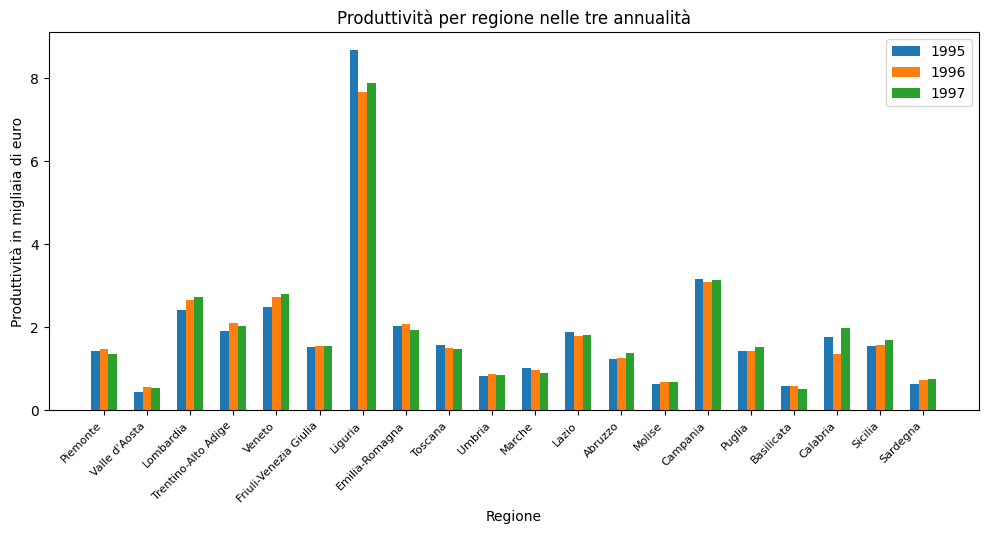

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Name: Regione, Length: 340, dtype: bool

In [12]:
import matplotlib.pyplot as plt

# Ottieni la lista delle regioni presenti nel dataset
regioni = df_pt["Regione"].unique()

# Inizializza le liste per i dati dell'asse x (regioni) e y (produttività)
regioni_labels = []
produttivita_1995 = []
produttivita_1996 = []
produttivita_1997 = []

# Calcola la produttività per ogni regione nelle tre annualità
for regione in regioni:
    cmp_a_1995 = df_pt[(df_pt["Anno"] == 1995) & (df_pt["Regione"] == regione)]["Produttività in migliaia di euro"]
    cmp_a_1996 = df_pt[(df_pt["Anno"] == 1996) & (df_pt["Regione"] == regione)]["Produttività in migliaia di euro"]
    cmp_a_1997 = df_pt[(df_pt["Anno"] == 1997) & (df_pt["Regione"] == regione)]["Produttività in migliaia di euro"]

    regioni_labels.append(regione)
    produttivita_1995.append(cmp_a_1995.iloc[0])
    produttivita_1996.append(cmp_a_1996.iloc[0])
    produttivita_1997.append(cmp_a_1997.iloc[0])

# Crea il grafico a barre per ogni regione
x = np.arange(len(regioni_labels))
width = 0.2


fig, ax = plt.subplots(figsize=(12, 6))  # Imposta la dimensione della figura

rects1 = ax.bar(x - width, produttivita_1995, width, label='1995')
rects2 = ax.bar(x, produttivita_1996, width, label='1996')
rects3 = ax.bar(x + width, produttivita_1997, width, label='1997')

# Aggiungi etichette agli assi
ax.set_xlabel('Regione')
ax.set_ylabel('Produttività in migliaia di euro')

# Aggiungi un titolo al grafico
ax.set_title('Produttività per regione nelle tre annualità')

# Aggiungi una legenda
ax.legend()

# Aggiungi le etichette delle regioni sull'asse x con margini personalizzati
ax.set_xticks(x)
ax.set_xticklabels(regioni_labels, rotation=45, ha='right', fontsize=8)

# Imposta i margini del grafico per mostrare completamente le etichette delle regioni
plt.subplots_adjust(bottom=0.25)

# Mostra il grafico
plt.show()

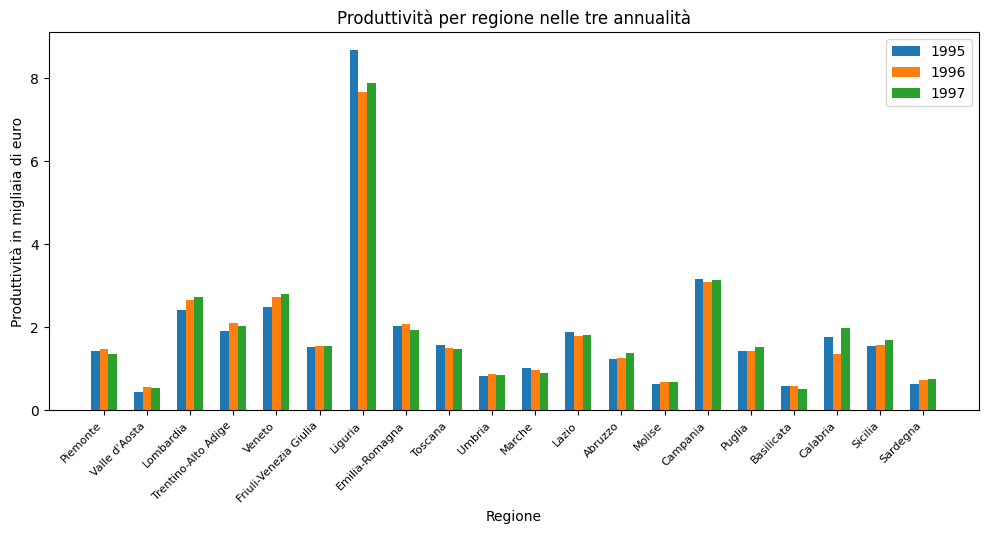

In [ ]:
import matplotlib.pyplot as plt

# Ottieni la lista delle regioni presenti nel dataset
regioni = df_pt["Regione"].unique()

# Inizializza le liste per i dati dell'asse x (regioni) e y (produttività)
regioni_labels = []
produttivita_1995 = []
produttivita_1996 = []
produttivita_1997 = []

# Calcola la produttività per ogni regione nelle tre annualità
for regione in regioni:
    cmp_a_1995 = df_pt[(df_pt["Anno"] == 1995) & (df_pt["Regione"] == regione)]["Produttività in migliaia di euro"]
    cmp_a_1996 = df_pt[(df_pt["Anno"] == 1996) & (df_pt["Regione"] == regione)]["Produttività in migliaia di euro"]
    cmp_a_1997 = df_pt[(df_pt["Anno"] == 1997) & (df_pt["Regione"] == regione)]["Produttività in migliaia di euro"]

    regioni_labels.append(regione)
    produttivita_1995.append(cmp_a_1995.iloc[0])
    produttivita_1996.append(cmp_a_1996.iloc[0])
    produttivita_1997.append(cmp_a_1997.iloc[0])

# Crea il grafico a barre per ogni regione
x = np.arange(len(regioni_labels))
width = 0.2

 # Imposta la dimensione della figura
fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, produttivita_1995, width, label='1995')
rects2 = ax.bar(x, produttivita_1996, width, label='1996')
rects3 = ax.bar(x + width, produttivita_1997, width, label='1997')

# Aggiungi etichette agli assi
ax.set_xlabel('Regione')
ax.set_ylabel('Produttività in migliaia di euro')

# Aggiungi un titolo al grafico
ax.set_title('Produttività per regione nelle tre annualità')

# Aggiungi una legenda
ax.legend()

# Aggiungi le etichette delle regioni sull'asse x con margini personalizzati
ax.set_xticks(x)
ax.set_xticklabels(regioni_labels, rotation=45, ha='right', fontsize=8)

# Imposta i margini del grafico per mostrare completamente le etichette delle regioni
plt.subplots_adjust(bottom=0.25)

# Mostra il grafico
plt.show()